In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

plt.style.use("ggplot")

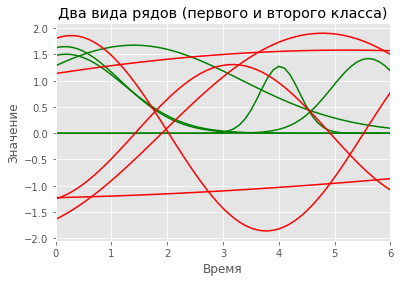

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [4]:
N = 100  ## количество семплов каждого класса
Nvis = 5  ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints)

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2 * np.pi * random.random()
    a1 = 5 * random.random()
    A = 1 + random.random()

    df["t"] = t  ## ось времени
    df["y"] = A * np.exp(-((df.t - t0) ** 2) / 2 / a1)  ## значения временного ряда
    df["label"] = 1  ## класс временного ряда
    df["id"] = i  ## номер временного ряда

    data = data.append(df)  ## добавляем семпл в общий дейтафрейм
    if i < Nvis:  ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color="g")

## генерируем семплы второго класса
for i in range(N, 2 * N):
    A = 1 + random.random()  ## амплитуда
    w = 0 + random.random()  ## частота
    ph = 2 * np.pi * random.random()  ## фаза

    df["t"] = t  ## ось времени
    df["y"] = A * np.sin(t * w + ph)  ## значения временного ряда
    df["label"] = 0  ## класс временного ряда
    df["id"] = i  ## номер временного ряда

    data = data.append(df)  ## добавляем семпл в общий дейтафрейм
    if i < Nvis + N:  ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color="r")

## cдвигаем все значения вверх, чтобы все значения были положительными
data["y"] = data.y + np.abs(data.y.min())

plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Два вида рядов (первого и второго класса)")
plt.xlim([t[0], t[-1]])
plt.show()

print("data.shape =", data.shape)
print("data.id.nunique() =", data.id.nunique())
data.head(3)

Поверните дейтафрейм так, чтобы единицы времени являлись названием колонок. Используйте для этого функцию pivot. Укажите значение колонки "0.8" в первой строке.



In [7]:
data_pivoted = data.pivot(index="id", columns="t", values="y")
data_pivoted = data_pivoted.reset_index(drop=True)
data_pivoted["label"] = 0
data_pivoted.loc[N:, "label"] = 1
print("data_pivoted.shape =", data_pivoted.shape)
data_pivoted.head(3)

data_pivoted.shape = (200, 62)


t,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,...,5.2,5.300000000000001,5.4,5.5,5.6000000000000005,5.7,5.800000000000001,5.9,6.0,label
0,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,1.962614,1.959628,1.958462,1.958044,1.957907,1.957865,1.957853,1.957850,1.957850,0
1,3.241556,3.289581,3.335656,3.379460,3.420678,3.459009,3.494166,3.525883,3.553915,3.578042,...,2.194464,2.170989,2.149323,2.129392,2.111119,2.094421,2.079213,2.065405,2.052910,0
2,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,3.134488,3.234827,3.312206,3.361605,3.379718,3.365310,3.319365,3.244966,3.146961,0


Сделайте разбиение на тренировочный и тестовый датасеты при помощи train_test_split c параметрами test_size=0.4, random_state=42. После сделайте разложение при помощи NMF с параметрами: n_components=5, init='nndsvd', random_state=42, tol=0.001, max_iter=5000, solver='cd'. Натенируйте модель, получите функции разложения Н и коэффициенты разложения W_train, W_test для тренировочного и тестового сетов. Не забудьте убрать колонку label перед тренировкой.

Укажите значение H[0][0] с точностью до второго знака после запятой.

In [11]:
train, test = train_test_split(data_pivoted, test_size=0.4, random_state=42)

## составляем список колонок со временем (без "label")
time_columns = train.drop("label", axis=1).columns

## факторизуем (раскладываем исходную матрицу на две)
## описываем требования к разложению (основное - раскладываем на три компоненты)
model = NMF(
    n_components=5,
    init="nndsvd",
    random_state=42,
    tol=0.001,
    max_iter=5000,
    solver="cd",
)
## находим функции разложения и извлекаем их
model.fit(train[time_columns])
H = model.components_
## получаем коэффициенты разложения для тренировочного и тестового сетов
W_train = model.transform(train[time_columns])
W_test = model.transform(test[time_columns])

print("H.shape =", H.shape)
print("W_train.shape =", W_train.shape)  # выделенные признаки
print("W_test.shape =", W_test.shape)  # выделенные признаки


H.shape = (5, 61)
W_train.shape = (120, 5)
W_test.shape = (80, 5)


/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/Users/alexigna/projects/skillfactory/data science/skillfactory_rds/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [17]:
H[0][0]

0.0

Реконструируйте нулевой элемент из тренировочного сета, используя базовые функции и коэффициенты разложения. Для этого скалярно перемножьте их. Укажите 55-ый элемент реконструированной функции, округлив его до второго знака после запятой.

Коэффициенты разложения для 0-элемента: [0.5269669  0.56869138 0.85182499 0.22941802 1.08754509]


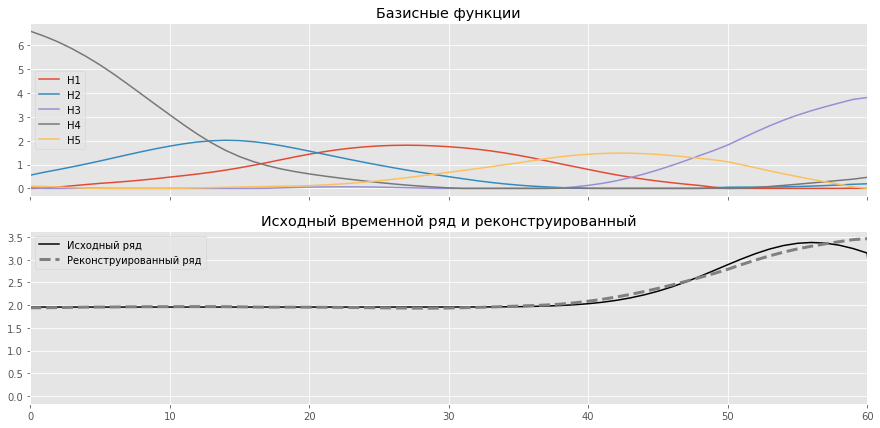

In [19]:
ind = 0

f, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
ax[0].plot(H[0,:])
ax[0].plot(H[1,:])
ax[0].plot(H[2,:])
ax[0].plot(H[3,:])
ax[0].plot(H[4,:])
ax[0].legend(['H1', 'H2', 'H3', 'H4', 'H5'])
# ax[0].legend(['H1', 'H2', 'H3'])
ax[0].set_title("Базисные функции")


print(f'Коэффициенты разложения для {ind}-элемента: {W_train[ind]}')
y = train.iloc[ind].values

ax[1].plot(y, 'k')

reconstr = W_train[ind].dot(H)
ax[1].plot(reconstr, color='gray', linestyle='--', lw=3)
ax[1].set_title('Исходный временной ряд и реконструированный')
ax[1].legend(['Исходный ряд', 'Реконструированный ряд'])
ax[1].set_xlim([0, len(y)-2])
plt.show()

In [22]:
round(reconstr[55],2)

3.24

In [23]:
trainSet = pd.DataFrame()
testSet = pd.DataFrame()

## записываем фичи в дейтафрейм
for i in range(np.shape(W_train)[1]):
    trainSet["W_" + str(i)] = W_train[:, i]

for i in range(np.shape(W_test)[1]):
    testSet["W_" + str(i)] = W_test[:, i]

## добавляем классы исходного ряда
trainSet["label"] = train.label.values
testSet["label"] = test.label.values

print("trainSet.shape =", trainSet.shape)
print("testSet.shape =", testSet.shape)
print()
print("Value counts train:\n", trainSet.label.value_counts())
print()
print("Value counts test:\n", testSet.label.value_counts())

trainSet.head(3)

trainSet.shape = (120, 6)
testSet.shape = (80, 6)

Value counts train:
 1    60
0    60
Name: label, dtype: int64

Value counts test:
 1    40
0    40
Name: label, dtype: int64


,W_0,W_1,W_2,W_3,W_4,label
0,0.526967,0.568691,0.851825,0.229418,1.087545,0
1,0.915421,1.114792,0.426635,0.391599,1.128027,0
2,0.273371,0.707296,0.635233,0.203901,1.864772,0


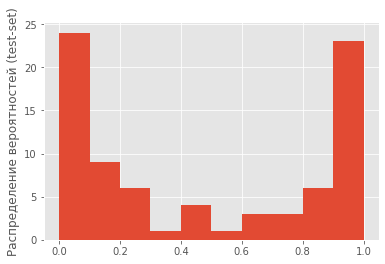

  features  importances
3      W_3     0.404465
2      W_2     0.229784
4      W_4     0.173027
1      W_1     0.137276
0      W_0     0.055448

   Neg  Pos
0   38    2
1    6   34

AUC = 0.972  Точность = 0.900



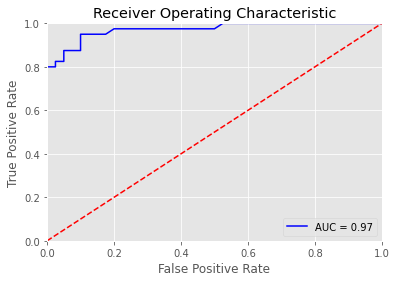

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

featureList = trainSet.drop("label", axis=1).columns

## параметры классификатора
params = {
    "n_estimators": 100,
    "max_depth": 20,
    "min_samples_split": 2,
    "max_features": 1.0,
    "class_weight": "balanced",
    "random_state": 42,
}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet["label"])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt

plt.hist(y_pred_proba)
plt.ylabel("Распределение вероятностей (test-set)")
plt.show()

## создадим для удобства дейтафрейм с результатами
res = testSet
res["pred"] = y_pred
res["pred_proba"] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt["features"] = featureList
ftmprt["importances"] = clf.feature_importances_
ftmprt = ftmprt.sort_values("importances", ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

# confusion matrix
CM = confusion_matrix(res["label"], res["pred"])

CM_DF = pd.DataFrame(data=CM, columns=["Neg", "Pos"])
print(CM_DF)

## считаем матрицу ошибок
FPR, TPR, thresholds = roc_curve(res["label"], res["pred_proba"])
roc_auc = auc(FPR, TPR)
acc = res[res["pred"] == res["label"]].shape[0] / res.shape[0]
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(FPR, TPR, "b", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()